In [1]:
import xarray as xr
import numpy as np

In [2]:
ds = xr.Dataset(
    {
        "x": (("x", ), np.linspace(-1, 1, 100)),
        "y": (("y", ), np.linspace(0, 1, 50)),
        "z": (("z", ), np.linspace(0, -1000, 40)),
    }
)

ds["mld"] = (
    10 
    + 500 * (
        np.sin(np.pi * ds.x * np.random.uniform(0.95, 1.05, size=ds.x.data.shape))
        * np.cos(.5 * np.pi * ds.y * np.random.uniform(0.95, 1.05, size=ds.y.data.shape))
    ) ** 2
)

ds["temp"] = (
    15
    + 5 * np.exp(ds.z / ds.mld)
)

ds

<xarray.Dataset>
Dimensions:  (x: 100, y: 50, z: 40)
Coordinates:
  * x        (x) float64 -1.0 -0.9798 -0.9596 -0.9394 ... 0.9596 0.9798 1.0
  * y        (y) float64 0.0 0.02041 0.04082 0.06122 ... 0.9592 0.9796 1.0
  * z        (z) float64 0.0 -25.64 -51.28 -76.92 ... -948.7 -974.4 -1e+03
Data variables:
    mld      (x, y) float64 16.71 16.71 16.69 16.66 ... 10.0 10.0 10.0 10.0
    temp     (z, x, y) float64 20.0 20.0 20.0 20.0 20.0 ... 15.0 15.0 15.0 15.0

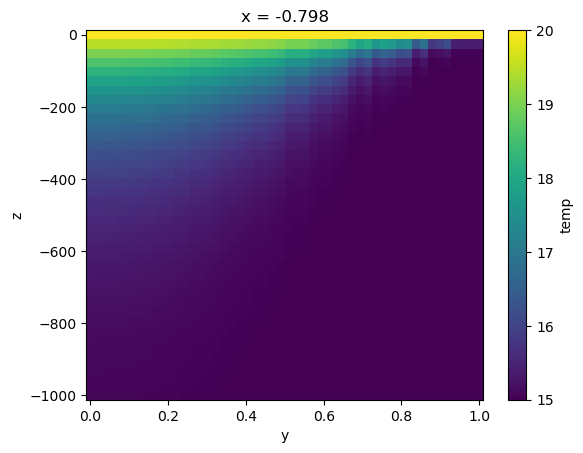

In [3]:
ds.temp.isel(x=10).plot()

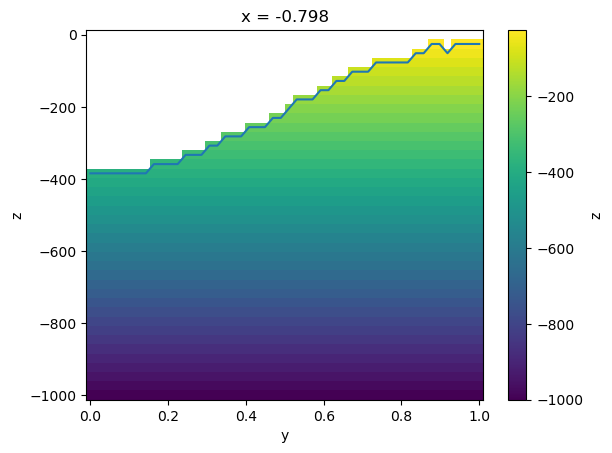

In [6]:
ds.z.where(ds.temp < 16).isel(x=10).plot()
ds.z.where(ds.temp < 16).isel(x=10).idxmax("z").plot()

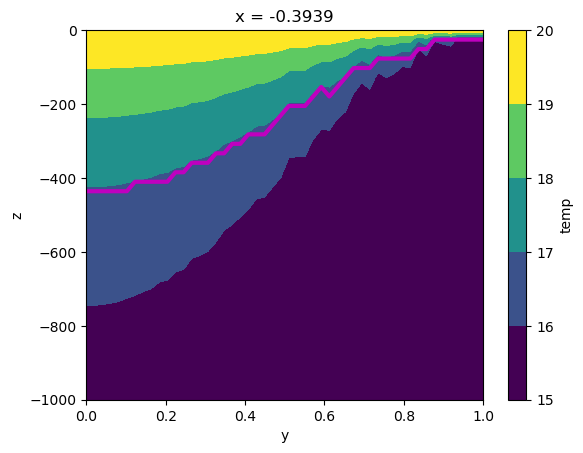

In [8]:
ds.temp.isel(x=30).plot.contourf()
ds.z.where(ds.temp < 17).idxmax("z").isel(x=30).plot(color="m", linewidth=3)